<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

Daniel Vidal Soroa  
Juan Diego Peña 

## Clasificación de mangos en tres clases según su presencia para la exportación, comercio local o procesamiento industrial

#### Importación de las librerías:

In [25]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from random import seed
from random import randint
from tensorflow import keras
from keras import layers, models, utils, datasets
from keras import utils
from keras.preprocessing.image import ImageDataGenerator

#### Función para mostrar lista de imágenes en escala de grises

In [3]:
def show_row_of_gray_images(fig_width, *images):
    plt.figure(figsize=(fig_width, fig_width))
    images_count = len(images)
    index = 1  
    for image in images:
        plt.subplot(1, images_count, index)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        index+=1

In [42]:
IMG_SIZE = 150

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


#### Lectura de los datos:

In [9]:
# seed random number generator
seed(1)

# Dimensión de entrada de las imágenes 
h, w = IMG_SIZE


# Leer los nombres de las imágenes para importarlas
input_class1_path = "./Dataset/Grading_dataset/Class_I"
class1_names = os.listdir(input_class1_path)
input_class2_path = "./Dataset/Grading_dataset/Class_II"
class2_names = os.listdir(input_class2_path)
input_classex_path = "./Dataset/Grading_dataset/Extra_Class"
class3_names = os.listdir(input_classex_path)

# Número de elementos en cada clase
n = len(class1_names)

# Definir listas para cargar imágenes
class1 = np.zeros([n, h, w, 1])
class2 = np.zeros([n, h, w, 1])
class3 = np.zeros([n, h, w, 1])



for i in range(0, n, 1):
    # Para cada clase, se lee una imágen, se importa
    img = resize(imread("./Dataset/Grading_dataset/Class_I/" + class1_names[i], as_gray=True), (h, w))
    class1[i,:,:,0] = img  
    img = resize(imread("./Dataset/Grading_dataset/Class_II/" + class2_names[i], as_gray=True), (h, w))
    class2[i,:,:,0] = img 
    img = resize(imread("./Dataset/Grading_dataset/Extra_Class/" + class3_names[i], as_gray=True), (h, w))
    class3[i,:,:,0] = img 



#### Imprimimos aleatoriamente una imágen de cada clase para comprobar que se leyeron correctamente

141


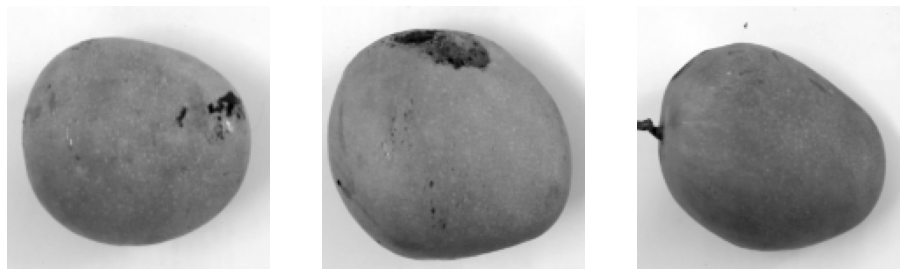

In [33]:
rn = randint(0, 200)
print (rn)
img_1 = class1[rn]
img_2 = class2[rn]
img_3 = class3[rn]    
show_row_of_gray_images(16, img_1, img_2, img_3)

### Aumentamos a por un factor f el número de datos de cada clase

710
458
488


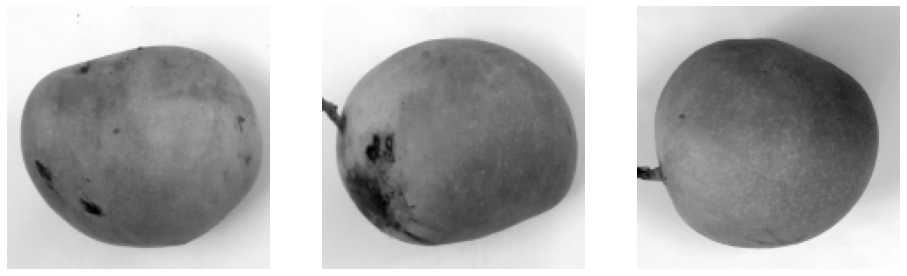

In [45]:
f = 10
class1_augmeted = np.zeros([n * f, h, w, 1])
class2_augmeted = np.zeros([n * f, h, w, 1])
class3_augmeted = np.zeros([n * f, h, w, 1])
t1 = np.zeros(n * f)
t2 = np.zeros(n * f)
t3 = np.zeros(n * f)

for i in range(n * f):
    rn = randint(0, n-1)
    img = class1[rn]
    new_img = data_augmentation(img)
    class1_augmeted [i] = new_img
    t1[i] = 1
    
    rn = randint(0, n-1)
    img = class2[rn]
    new_img = data_augmentation(img)
    class2_augmeted [i] = new_img
    t2[i] = 2
    
    rn = randint(0, n-1)
    img = class3[rn]
    new_img = data_augmentation(img)
    class3_augmeted [i] = new_img
    t3[i] = 3

# Se imprimen tres imágenes aleatorias de los datos aumentados para comprobar que funciona    
rn = randint(0, 2000)
print (rn)
img_1 = class1_augmeted[10]
rn = randint(0, 2000)
print (rn)
img_2 = class2_augmeted[rn]
rn = randint(0, 2000)
print (rn)
img_3 = class3_augmeted[rn]  
show_row_of_gray_images(16, img_1, img_2, img_3)


#### Validación cruzada de los modelos (Logistic Regression, LDA y KNN):

In [41]:
from sklearn import metrics
CV = 20
X = np.zeros([n*3,r*c])
X[0:200] = extra_class.reshape(n,r*c)
X[200:400] = class1.reshape(n,r*c)
X[400:600] = class2.reshape(n,r*c)
t = np.zeros(n*3)
t[0:200] = text
t[200:400] = t1
t[400:600] = t2

scoring = ['recall_macro', 'precision_micro', 'recall_micro', 'f1_macro','accuracy']

modelLR = LogisticRegression(penalty='none', solver = 'lbfgs', max_iter=10000, multi_class='multinomial')
scoresLR = cross_validate(modelLR, X, t, cv=CV, scoring=scoring)
print('Media del LR  : ', np.mean(scoresLR['test_accuracy']))

modelLDA = LinearDiscriminantAnalysis()
scoresLDA = cross_validate(modelLDA, X, t, cv=CV, scoring=scoring)
print('Media del LDA : ', np.mean(scoresLDA['test_accuracy']))

#modelKNN = KNeighborsClassifier(round(np.sqrt(n)))
#scoresKNN = cross_validate(modelKNN, X, t, cv=CV, scoring=scoring)
#print('Media del KNN : ', np.mean(scoresKNN['test_accuracy']))

Media del LR  :  0.6016666666666668
Media del LDA :  0.6683333333333332


El conjunto de entrenamiento contiene 420 datos
El conjunto de test contiene 180 datos


Text(0, 0.5, 'Clase real')

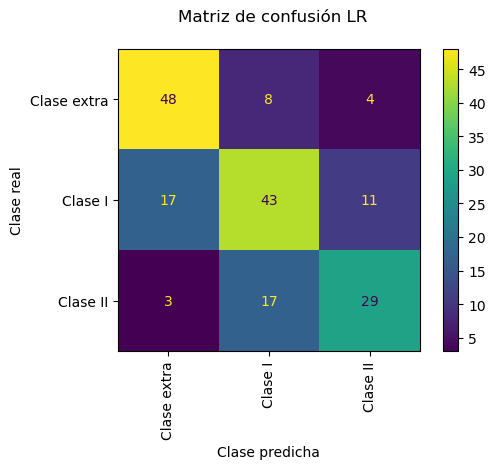

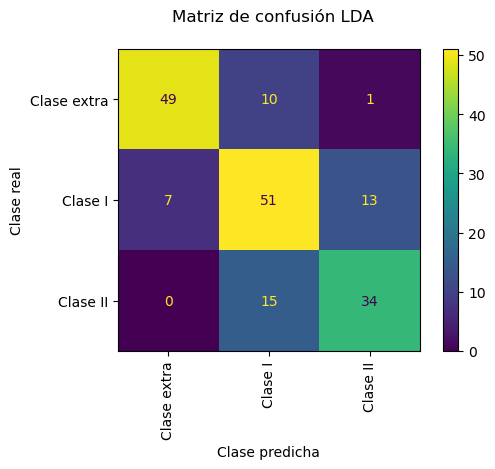

In [43]:
Clases=['Clase extra','Clase I','Clase II']
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7)  
print("El conjunto de entrenamiento contiene", len(t_train), "datos")
print("El conjunto de test contiene", len(t_test), "datos")

#modelKNN.fit(X_train, t_train)
#disp = plot_confusion_matrix(modelKNN, X_test, t_test, display_labels = Clases, xticks_rotation = 'vertical') # Muestra gráficamente la matriz de confusión
#disp.figure_.suptitle("Matriz de confusión KNN");         # Añade un título a la figura de la matriz de confusión
#disp.figure_.set_dpi(100)                             # Establece el tamaño de la figura
#plt.xlabel("Clase predicha")
#plt.ylabel("Clase real")

modelLR.fit(X_train, t_train)
disp = plot_confusion_matrix(modelLR, X_test, t_test, display_labels = Clases, xticks_rotation = 'vertical') # Muestra gráficamente la matriz de confusión
disp.figure_.suptitle("Matriz de confusión LR");         # Añade un título a la figura de la matriz de confusión
disp.figure_.set_dpi(100)                             # Establece el tamaño de la figura
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")

modelLDA.fit(X_train, t_train)
disp = plot_confusion_matrix(modelLDA, X_test, t_test, display_labels = Clases, xticks_rotation = 'vertical') # Muestra gráficamente la matriz de confusión
disp.figure_.suptitle("Matriz de confusión LDA");         # Añade un título a la figura de la matriz de confusión
disp.figure_.set_dpi(100)                             # Establece el tamaño de la figura
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")

#### Se muestra un diagrama de cajas con los resultados de la validación cruzada:

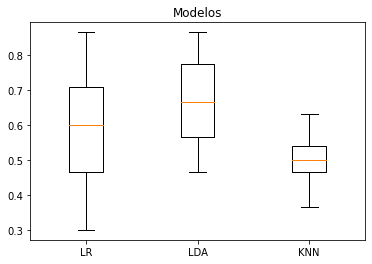

In [82]:
data = [scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy']]
fig7, ax = plt.subplots()
ax.set_title('Modelos')
ax.boxplot(data,labels=['LR', 'LDA', 'KNN']);

#### Contraste de hipótesis:

Primero se muestran los resultados obtenidos aplicando el test de [Kruskall-Wallis](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) y el test de [Anova](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Si se rechaza la hipótesis, entonces se puede afirmar que los modelos son diferentes y, posteriormente, se aplican dos test de comparación múltiple mediante el uso de la clase [MultiComparison](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html). Estos métodos comprueban si hay diferencias significativas con un p<0.05, corrigiendo el hecho de que se están haciendo múltiples comparaciones que normalmente aumentarían la probabilidad de que se identifique una diferencia significativa. Un resultado de "reject = true" significa que se ha observado una diferencia significativa:
- Método de Tukey. Se emplea para ello la función [tukeyhsd](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd.html#statsmodels.sandbox.stats.multicomp.MultiComparison.tukeyhsd).
- Método de Holm-Bonferroni. Se emplea para ello la función [allpairtest](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest.html#statsmodels.sandbox.stats.multicomp.MultiComparison.allpairtest)

In [83]:
alpha = 0.05
F_statistic, pVal = stats.kruskal(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
F_statistic2, pVal2 = stats.f_oneway(scoresLR['test_accuracy'], scoresLDA['test_accuracy'], scoresKNN['test_accuracy'])
print ('p-valor KrusW:', pVal)
print ('p-valor ANOVA:', pVal2)
if pVal <= alpha:
    print('Rechazamos la hipótesis: los modelos son diferentes\n')
    stacked_data = np.vstack((scoresLR['test_accuracy'],scoresLDA['test_accuracy'],scoresKNN['test_accuracy'])).ravel()
    stacked_model = np.vstack((np.repeat('modelLR',CV),np.repeat('modelLDA',CV),np.repeat('modelKNN',CV))).ravel()    
    MultiComp = MultiComparison(stacked_data, stacked_model)
    comp = MultiComp.allpairtest(stats.ttest_rel, method='Holm')
    print (comp[0])    
    print(MultiComp.tukeyhsd(alpha=0.05))
else:
    print('Aceptamos la hipótesis: los modelos son iguales')

p-valor KrusW: 0.00042614900422063547
p-valor ANOVA: 0.00021999310037581105
Rechazamos la hipótesis: los modelos son diferentes

Test Multiple Comparison ttest_rel 
FWER=0.05 method=Holm
alphacSidak=0.02, alphacBonf=0.017
 group1   group2    stat   pval  pval_corr reject
-------------------------------------------------
modelKNN modelLDA -8.7529    0.0       0.0   True
modelKNN  modelLR -3.7438 0.0014    0.0014   True
modelLDA  modelLR  4.2041 0.0005     0.001   True
-------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
modelKNN modelLDA   0.1667  0.001  0.0755 0.2579   True
modelKNN  modelLR      0.1 0.0285  0.0088 0.1912   True
modelLDA  modelLR  -0.0667 0.1927 -0.1579 0.0245  False
-------------------------------------------------------
